## Put the names of all group members present today below:

Haobo.Liu, Kaitlyn Watson, David Robbins, Christian Lulaj

# 10 In-Class Assignment: Eigenproblems

<img src="https://campusinvolvement.umich.edu/files/campusinvolvement/field/image/helmets.jpg" alt="Image of two football helmets hitting each other. One is MSU and one is UofM which matches an example we will do in class" width="50%">

Image from: [https://campusinvolvement.umich.edu/](https://campusinvolvement.umich.edu/) 

### Objectives

1. Recall the formula $Av=\lambda v$ for finding eigenvalues/eigenvectors and be able to relate this to their geometric interpretation. 
1. Be able to calculate eigenvalues and eigenvectors for 2x2 matrices by hand
1. Calculate eigenvalues and eigenvectors using python
1. Scale eigenvectors so that they meet some criteria (entries sum to 1, entries sum to 24, a given entry is a fixed value, etc.) 
1. Markov Models
 - Create a matrix that represents a Markov Model
 - Use eigenvalues/eigenvectors of this matrix to find and interpret the steady-state solution of the system. 





---
<a name=Introduction-to-Markov-Models></a>
## 1.  Markov Models


>In probability theory, a Markov model is a stochastic model used to model randomly changing systems. 
It is assumed that future states depend only on the current state, not on the events that occurred before it.
>
> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/1126px-Markovkate_01.svg.png" width=25%>
> A diagram representing a two-state Markov process, with the states labelled E and A. 
Each number represents the probability of the Markov process changing from one state to another state, with the direction indicated by the arrow. 
For example, if the Markov process is in state A, then the probability it changes to state E is 0.4, while the probability it remains in state A is 0.6.

From: [Wikipedia](https://en.wikipedia.org/wiki/Markov_model)

The above state model can be represented by a transition matrix. 

$$
\begin{array}{cc}
& \text{Current State}  \\
P =  &
\begin{bmatrix}
    p_{A\rightarrow A} & p_{E\rightarrow A}  \\
    p_{A\rightarrow E} & p_{E\rightarrow E} 
\end{bmatrix}
\end{array}
\text{Next state}
$$

In other words we can write the above as follows

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

In [ ]:
A = np.matrix([[0.6, 0.7],[0.4, 0.3]])
sym.Matrix(A)

⎡0.6  0.7⎤
⎢        ⎥
⎣0.4  0.3⎦

Notice how the columns in the matrix all add to one. This is because all of the transition probabilities out of a matrix must add to 100 percent. 

Now, consider the following house map with cats in each room...

At each time step, there is an equal probability of a cat staying in their current room or moving to a new room. 
If a cat chooses to leave a room, then there is an equal chance of that cat picking any of the doors in the room to leave. 

<img src="https://lh4.googleusercontent.com/CGFHfJgtrPu-2bZPhPul1ll8B3tqC1Vs8jRwnZ13v8MqRAagWhrSmJ0cznYIP3ePg5co5AVI8g=w712" alt="Top down diagram of a house with three rooms (see text for more description" width="50%">

&#9989;**<font color=red>DO THIS :</font>** Try to draw a Markov chain (Markov matrix) for the above system of equations. Be prepared to share your diagram with the class. 

A Markov chain can be represented as a Markov transition model of the form $Ax=b$. 
Where $A$ is your probability tranisition matrix (often represented as a $P$ instead of an $A$). 
$x$ is the state before the transition and $b$ is the state after the transition.

&#9989;**<font color=red>QUESTION:</font>** Generate a Markov transition model represented as a matrix $P$ of the form:
$$
\begin{array}{ccc}
& \text{Current Room}  \\
P =  &
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{23} \\
    p_{31} & p_{32} & p_{33} 
\end{bmatrix}
\end{array}
\text{Next Room}
$$

Where $p_{ij}$ are probability transitions of the cat moving between rooms (from room $j$ to room $i$):

In [ ]:
##put your answer here

P = np.matrix([[0.5,1/3, 1/4],[1/3, 0.5, 1/4],[1/6, 1/6, 0.5]])
P

matrix([[0.5       , 0.33333333, 0.25      ],
        [0.33333333, 0.5       , 0.25      ],
        [0.16666667, 0.16666667, 0.5       ]])

In [ ]:
#P = np.matrix([[0.5,1/3, 1/6],[1/3, 0.5, 1/6],[1/4, 1/4, 0.5]]).T
#P

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(P,'1001a6fa07727caf8ce05226b765542c');

Testing [[0.5     0.33333 0.25   ]
 [0.33333 0.5     0.25   ]
 [0.16667 0.16667 0.5    ]]
Answer seems to be correct



&#9989;**<font color=red>QUESTION:</font>**  Let's assume that the system starts with; 6 cats in room 1, 15 cats in room 2, and 3 cats in room 3. How many cats will be in each room after one time step (Store the values in a vector called ```current_state```)?

In [ ]:
#Put your answer to the above question here.

C = np.matrix([[6], [15], [3]])
current_state = P * C
current_state

matrix([[ 8.75],
        [10.25],
        [ 5.  ]])

In [ ]:
from answercheck import checkanswer

checkanswer.vector(current_state,'98d5519be82a0585654de5eda3a7f397');


    Trying to convert to a column vector using ```A = A.T```.

Testing [[ 8.75 10.25  5.  ]]
Answer seems to be correct



&#9989;**<font color=red>QUESTION:</font>** The following code will plot the number of cats as a function of time ($t$).  When this system converges, what is the steady state?

[[9.00002533]
 [9.00002548]
 [5.99994919]]
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


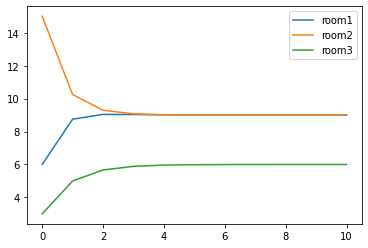

In [ ]:
#Define Start State
room1 = [6]
room2 = [15]
room3 = [3]

current_state = np.matrix([room1, room2, room3])

for i in range(10):
    #update Current State
    current_state = P*current_state
    
    #Store history for each room
    room1.append(current_state[0])
    room2.append(current_state[1])
    room3.append(current_state[2])
    
plt.plot(room1, label="room1");
plt.plot(room2, label="room2");
plt.plot(room3, label="room3");
plt.legend();
print(current_state)

Inspect the generated graph and put your answer to the above question here

For the above graph the steady state is: Room 1 is 9, Room 2 is 9, Room 3 is 6

&#9989;**<font color=red>QUESTION:</font>**  Calculate the eigenvalues and eigenvectors of your transition matrix $P$. 

In [ ]:
##put your answer here

eig = np.linalg.eig(P)
eig_vals = eig[0]
eig_vecs = eig[1]
for i in range(len(eig_vals)):
    print(eig_vals[i], ": ", eig_vecs[i])

0.9999999999999997 :  [[-0.63960215 -0.70710678 -0.40824829]]
0.16666666666666677 :  [[-0.63960215  0.70710678 -0.40824829]]
0.33333333333333326 :  [[-4.26401433e-01 -5.28299654e-17  8.16496581e-01]]


The eigenvector associated with the eigenvalue of 1 represents the steady state probability for our original transition matrix $P$.  

&#9989;**<font color=red>DO THIS:</font>** make a new vector called ```steadystate``` from the eigenvector of your $P$ matrix with a eigenvalue of 1.

In [ ]:
## Put your answer here

steadystate = np.array(eig_vecs[0])
print(steadystate)

[[-0.63960215 -0.70710678 -0.40824829]]


Since the ```steadystate``` vectors represent long term probibilities, they should sum to one (1).  However, most programming libraries (ex. numpy and sympy) return "normalized" eigenvectors to length of 1 (i.e. norm(e)==1). 

&#9989;**<font color=red>DO THIS:</font>**  Correct for the normalization by multiplying the ```steadystate``` eigenvector by a constant such that the sum of the vector elements add to 1. 

In [ ]:
#Put your answer here
constant = -1.57
sumT = 0
for i in range(len(steadystate)):
    sumT += constant * steadystate[0][i]
print(sumT)


1.0041753740349249


&#9989;**<font color=red>DO THIS:</font>**  Think about the cats problem, because one cat has to be in one of the three rooms. That means, the total number of cats will not change. If we add the number of cats at all rooms together, this number has to be the same. Therefore, if we start will 6+15+3=24 cats, there are also 24 cats at the ```steadystate```. Modify the steadystate to make sure the total number of cats is 24.

In [ ]:
constant = -37.6
sumT = 0
for i in range(len(steadystate)):
    sumT += constant * steadystate[0][i]
print(sumT)

24.04904080491285


&#9989;**<font color=red>QUESTION:</font>** Why does the sum of the numbers at every stage remain the same? 


The sum of the numbers at every stage must remain the same becuase the amount of cats will ALWAYS be 24 no matter where each cat goes. No cats leave the room.

---
<a name="Epi_discrete"></a>
## 2. Epidemic Dynamics - Discrete Case

The dynamics of infection and the spread of an epidemic can be modeled as a linear dynamical system. 

We count the fraction of the population in the following four groups:
+ Susceptible: the individuals can be infected next day
+ Infected: the infected individuals 
+ Recovered (and immune): recovered individuals from the disease and will not be infected again
+ Deceased: the individuals died from the disease

We denote the fractions of these four groups in $x(t)$. For example $x(t)=(0.8,0.1,0.05,0.05)$ means that at day $t$, 80\% of the population are susceptible, 10% are infected, 5% are recovered and immuned, and 5% died.

We choose a simple model here. After each day,

+ 5% of the susceptible individuals will get infected 
+ 3% of infected inviduals will die
+ 10% of infected inviduals will recover and become immune to the disease
+ 4% of infected inviduals will recover but will not be immune to the disease
+ 83% of the infected inviduals will remain infected


&#9989;  **<font color=red>Do this:</font>** Complete the transition matrix for this model:

$$
\begin{array}{ccc}
A =  &
\begin{bmatrix}
    0.95 & 0.04 & 0 & 0 \\
    0.05 & 0.83 & * & * \\
    * & * & * & * \\
    * & * & * & * \\
\end{bmatrix}
\end{array}
$$

In [ ]:
A = np.matrix([[0.95, 0.04, 0, 0],[0.05, 0.83, 0, 0],[0, 0.1, 1, 0],[0,0.03,0,1]])
sym.Matrix(A)

⎡0.95  0.04   0    0 ⎤
⎢                    ⎥
⎢0.05  0.83   0    0 ⎥
⎢                    ⎥
⎢ 0    0.1   1.0   0 ⎥
⎢                    ⎥
⎣ 0    0.03   0   1.0⎦

&#9989;  **<font color=red>Do this:</font>** If we start with $x(0) = (1, 0, 0, 0)$ for day 0. Use the `for` loop to find the distribution of the four groups after 50 days.

In [ ]:
x0 = np.matrix([[1],[0],[0],[0]])
x  = x0
for i in range(50):
    x = A*x
print(x)

[[0.15041595]
 [0.05576501]
 [0.61063003]
 [0.18318901]]


&#9989;  **<font color=red>Do this:</font>** Use the following code to apply the above transformation matrix for 200 iterations and plot the results.

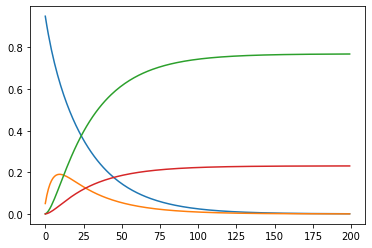

In [ ]:
x0 = np.matrix([[1],[0],[0],[0]])
n = 200 
x  = x0
x_all = np.matrix(np.zeros((4,n)))
for i in range(n):
    x = A*x
    x_all[:,i] = x[:,0]
for i in range(4):
    plt.plot(x_all[i].T)

---
<a name="Epi_continuous"></a>
## 3. Epidemic Dynamics - Continuous Model

Instead of using the discrete markov model, we can also use a continuous model with ordinary differential equations. 

For example, we have that 

$$
\dot{x}_1 = {dx_1(t)\over dt} = -0.05x_1(t)+ 0.04 x_2(t)
$$

It means that the changes in the susceptible group depends on susceptible and infected individuals. It increases because of the recovered people from infected ones and it decreases because of the infection. 

Similarly, we have the equations for all three groups.
$$
\begin{aligned}
\dot{x}_2 &= {dx_2(t)\over dt} = 0.05x_1(t)-0.17 x_2(t) \\ 
\dot{x}_3 &= {dx_3(t)\over dt}= 0.1 x_2(t) \\
\dot{x}_4 &= {dx_4(t)\over dt} = 0.03 x_2(t)
\end{aligned}
$$


&#9989;  **<font color=red>Do this:</font>** We can write it as system of ODEs as 
$$
\dot{x}(t) = Bx(t)
$$
Write down the matrix $B$ in `numpy.matrix`

In [ ]:
# Put your answer to the above question here.

B=np.matrix([[-0.05,0.04, 0,0], [0.05, -0.17, 0, 0], [0,0.1, 0, 0], [0,.03, 0, 0]])
B

matrix([[-0.05,  0.04,  0.  ,  0.  ],
        [ 0.05, -0.17,  0.  ,  0.  ],
        [ 0.  ,  0.1 ,  0.  ,  0.  ],
        [ 0.  ,  0.03,  0.  ,  0.  ]])

&#9989;  **<font color=red>Do this:</font>** Plot $x_1$ through $x_4$ as functions of time, where $t$ ranges from 0 to 200 days. Then compare the graph of your solution with the discrete version.  

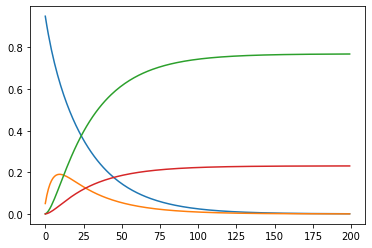

In [ ]:
x0 = np.matrix([[1],[0],[0],[0]])
n = 200 
x  = x0
x_all = np.matrix(np.zeros((4,n)))
for i in range(n):
    x = x + B*x
    x_all[:,i] = x[:,0]
for i in range(4):
    plt.plot(x_all[i].T)

&#9989;  **<font color=red>Finished? Great!</font>** Parts (2) and (3) should have given you (roughly) the same final state. Are these final states (nearly) eigenvectors of your matrices $A$ and $B$? Use Python to compute the eigenvalues and eigenvectors of these two matrices. What do you notice? You may want to compare with your results from Part (1).

In [ ]:

eig = np.linalg.eig(A)
eig_vals = eig[0]
eig_vecs = eig[1]
for i in range(len(eig_vals)):
    print(eig_vals[i], ": ", eig_vecs[i])

print("\n\n")
eig1 = np.linalg.eig(B)
eig_vals1 = eig1[0]
eig_vecs1 = eig1[1]
for i in range(len(eig_vals1)):
    print(eig_vals1[i], ": ", eig_vecs1[i])

1.0 :  [[ 0.          0.          0.65239417 -0.25009572]]
1.0 :  [[0.         0.         0.24192648 0.84302984]]
0.9648331477354788 :  [[ 1.          0.         -0.68793896 -0.45610317]]
0.8151668522645211 :  [[ 0.          1.         -0.20638169 -0.13683095]]



0.0 :  [[ 0.          0.          0.65239417 -0.25009572]]
0.0 :  [[0.         0.         0.24192648 0.84302984]]
-0.03516685226452118 :  [[ 1.          0.         -0.68793896 -0.45610317]]
-0.18483314773547885 :  [[ 0.          1.         -0.20638169 -0.13683095]]


Summarize your findings here:  The eigenvectors for A and B are both the same. However, the eigenvalues are difference for A and B. Furthermore, x1 and x2 have the same eigenvalues in matrix A (e.v=1) and the same eigenvalues in Matrix B (e.v.=0). These eigenvalues for matrix B that are equal to zero are technically not allowed. 

----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eddc04b2-32a0-43fc-87cf-17e6670be569' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>